Understand how contrastive embeddings use the dimensions of the embedding space.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch

In [80]:
from IsoScore.IsoScore import IsoScore

In [76]:
embedding_paths = {
    "phoneme": "../outputs/model_embeddings/timit/w2v2_6/rnn_8/phoneme/embeddings.npy",
    "phoneme3": "../outputs/model_embeddings/timit/w2v2_6/rnn_3/phoneme/embeddings.npy",
    "next_phoneme": "../outputs/model_embeddings/timit/w2v2_6/rnn_8/next_phoneme/embeddings.npy",
    "biphone_pred": "../outputs/model_embeddings/timit/w2v2_6/rnn_8/biphone_pred/embeddings.npy",
    "biphone_recon": "../outputs/model_embeddings/timit/w2v2_6/rnn_8/biphone_recon/embeddings.npy",
    "syllable": "../outputs/model_embeddings/timit/w2v2_6/rnn_8/syllable/embeddings.npy",
    "word": "../outputs/model_embeddings/timit/w2v2_6/rnn_8/word/embeddings.npy",

    "random_rnn": "../outputs/model_embeddings/timit/w2v2_6/randomrnn_8/random/embeddings.npy",
    "random_ff": "../outputs/model_embeddings/timit/w2v2_6/randomff_8/random/embeddings.npy",
}

In [77]:
embeddings = {key: np.load(path) for key, path in embedding_paths.items()}

In [73]:
from sklearn.decomposition import PCA
embeddings_decomp = {}
for key, emb in embeddings.items():
    pca = PCA(n_components=1)
    pca.fit(emb)
    
    # Remove first K principal components from embedding
    emb = emb - emb @ pca.components_.T @ pca.components_
    embeddings_decomp[key] = emb

# # DEV
# embeddings = embeddings_decomp

## Correlation measure

In [78]:
corrs = []
for key, embedding in embeddings.items():
    corrs_i = np.corrcoef(embedding.T)
    corrs_i = np.abs(corrs_i[np.triu_indices(corrs_i.shape[0], k=1)])

    for corrs_ij in corrs_i:
        corrs.append((key, corrs_ij))

<Axes: xlabel='model', ylabel='correlation'>

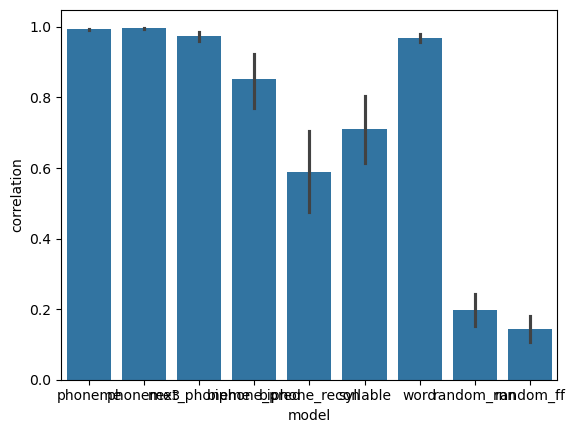

In [79]:
sns.barplot(data=pd.DataFrame(corrs, columns=["model", "correlation"]), x="model", y="correlation")

## IsoScore

In [89]:
isoscores = pd.Series({key: IsoScore(embeddings[key]).item() for key in embeddings})
isoscores

phoneme          0.000868
phoneme3         0.001282
next_phoneme     0.001456
biphone_pred     0.005771
biphone_recon    0.082468
syllable         0.030212
word             0.002826
random_rnn       0.661004
random_ff        0.740037
dtype: float64

<Axes: >

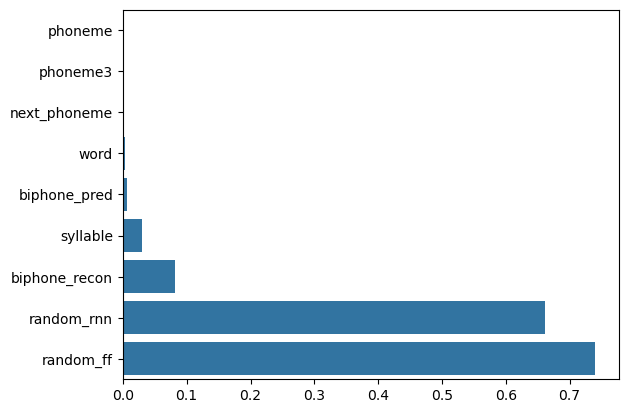

In [91]:
sns.barplot(isoscores, order=isoscores.sort_values().index, orient="h")